In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree


In [4]:
data=pd.read_csv('placement-dataset.csv')
data

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [7]:
X=data[['cgpa','iq']]
Y=data[['placement']]

In [8]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [9]:
model=DecisionTreeClassifier(random_state=42)

In [10]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [19]:
individual_data = [[6.2, 110.0]]  
placement_prediction = model.predict(individual_data)

print(f"Input: {individual_data[0]} | Predicted Placement: {'Placed' if placement_prediction[0] == 1 else 'Not Placed'}")

Input: [6.2, 110.0] | Predicted Placement: Placed


/Users/pranjalshukla/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [17]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)



In [18]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9
Confusion Matrix:
 [[10  0]
 [ 2  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



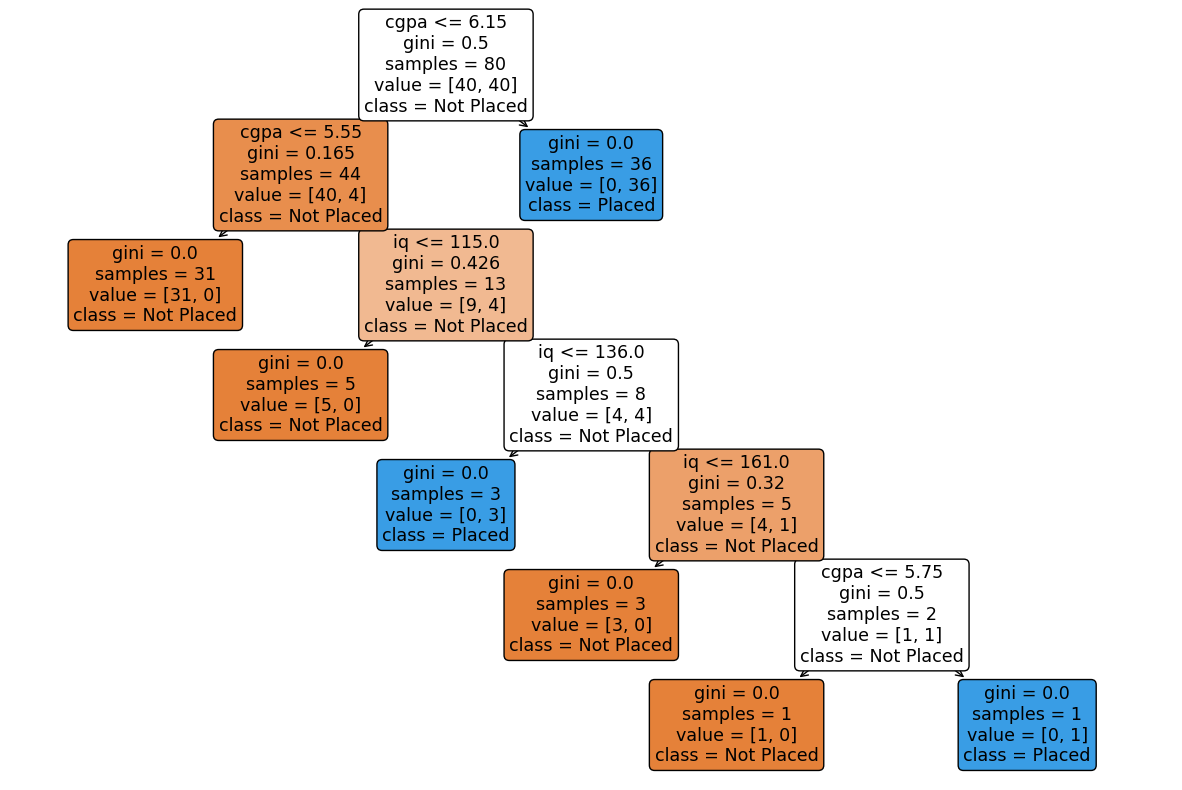

In [21]:
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=['cgpa', 'iq'], class_names=['Not Placed', 'Placed'], filled=True, rounded=True)
plt.show()